In [16]:
import os
os.environ["MXNET_CUDNN_LIB_CHECKING"] = "0"
os.environ["MXNET_CUDNN_AUTOTUNE_DEFAULT"] = "0"
import time
import random
import numpy as np
import mxnet as mx
from mxnet import  autograd, context
from mxnet.base import MXNetError
from sklearn.model_selection import train_test_split

import myModel
from image_Dictionary import ImageDict
import const
from my_Save import saveAsCSV, SaveModels
from mx_Train import myTrain
from decode.postprocessing.instance_segmentation import InstSegm
from myPlots import lossPlot, visualize_all
from iou import  get_iou

ctx=context.gpu()
mx.nd.waitall()
numberOfimages = 648

isVnir = True
imageType = "NDV"
if isVnir:
    imageType = "VNIR"

input_directory = const.images_2022
output_directory = os.path.join(const.result_2022, imageType, str(numberOfimages))
output_models= os.path.join(output_directory,"models")
result_path = os.path.join(output_directory, "result")
lossFile =   os.path.join(output_directory,"loss.csv") 
print('imageType:', imageType)

def makedir(path):
    os.makedirs(path, exist_ok=True)
    print(path)
    
for i in [output_directory, output_models, result_path]:
    makedir(i)

imageType: VNIR
D:\Source\Output\Result_2022\VNIR\648
D:\Source\Output\Result_2022\VNIR\648\models
D:\Source\Output\Result_2022\VNIR\648\result


In [5]:
#Function to load images and masks and Preprocessing
images= ImageDict(const.images_2022,  False)
image_dict  = images.load_tif_files(imageType, numberOfimages = numberOfimages)
masks = ImageDict(const.masks_2022, True)
mask_dict  = masks.load_tif_files(imageType, image_dict, numberOfimages = numberOfimages)
train_ids, val_ids = train_test_split(list(mask_dict.keys()), test_size=0.2, random_state=42)
print(len(image_dict))
print(len(mask_dict))


ID not in image_dict: 6586
Image contains NaN values 6920.tif.
Corrupted or invalid image: 6920.tif
647
638


In [6]:
def get_images(ids, image_dict):
    data=  np.array([image_dict[id].image for id in ids])
    return mx.nd.array(data)

train_images =get_images(train_ids, image_dict)
train_masks = get_images(train_ids, mask_dict)
val_images = get_images(val_ids, image_dict)
val_masks = get_images(val_ids, mask_dict)

In [7]:
batch_size=4
try:
    train_dataset = mx.gluon.data.ArrayDataset(train_images, train_masks)
    train_loader = mx.gluon.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=0,shuffle=True)
    val_loader = mx.gluon.data.DataLoader(mx.gluon.data.ArrayDataset(val_images, val_masks), batch_size=batch_size, num_workers=0, shuffle=False)

except Exception as e:
    print(f"Error creating data loaders: {e}")

depth:= 0, nfilters: 32, nheads::8, widths::1
depth:= 1, nfilters: 64, nheads::16, widths::1
depth:= 2, nfilters: 128, nheads::32, widths::1
depth:= 3, nfilters: 256, nheads::64, widths::1
depth:= 4, nfilters: 512, nheads::128, widths::1
depth:= 5, nfilters: 1024, nheads::256, widths::1
depth:= 6, nfilters: 512, nheads::256, widths::1
depth:= 7, nfilters: 256, nheads::128, widths::1
depth:= 8, nfilters: 128, nheads::64, widths::1
depth:= 9, nfilters: 64, nheads::32, widths::1
depth:= 10, nfilters: 32, nheads::16, widths::1
Start training now...
Epoch 0: Current Learning Rate = 0.001


Training Epoch 0:   0%|          | 0/128 [00:01<?, ?it/s]


cuDNN execution failed. Retrying... (1/5)
depth:= 0, nfilters: 32, nheads::8, widths::1
depth:= 1, nfilters: 64, nheads::16, widths::1
depth:= 2, nfilters: 128, nheads::32, widths::1
depth:= 3, nfilters: 256, nheads::64, widths::1
depth:= 4, nfilters: 512, nheads::128, widths::1
depth:= 5, nfilters: 1024, nheads::256, widths::1
depth:= 6, nfilters: 512, nheads::256, widths::1
depth:= 7, nfilters: 256, nheads::128, widths::1
depth:= 8, nfilters: 128, nheads::64, widths::1
depth:= 9, nfilters: 64, nheads::32, widths::1
depth:= 10, nfilters: 32, nheads::16, widths::1
Start training now...
Epoch 0: Current Learning Rate = 0.001


Training Epoch 0: 100%|██████████| 128/128 [16:53<00:00,  7.92s/it]


Training Loss: 0.5321093385573477


Validation Epoch 0: 100%|██████████| 32/32 [00:22<00:00,  1.40it/s]


Validation Loss: 0.49515161011368036
****************************************************************
Epoch 1: Current Learning Rate = 0.001


Training Epoch 1: 100%|██████████| 128/128 [16:14<00:00,  7.61s/it]


Training Loss: 0.48898380249738693


Validation Epoch 1: 100%|██████████| 32/32 [00:18<00:00,  1.69it/s]


Validation Loss: 0.48363163974136114
****************************************************************
Epoch 2: Current Learning Rate = 0.001


Training Epoch 2: 100%|██████████| 128/128 [16:45<00:00,  7.85s/it]


Training Loss: 0.4754446854349226


Validation Epoch 2: 100%|██████████| 32/32 [00:19<00:00,  1.66it/s]


Validation Loss: 0.4825439704582095
****************************************************************
Epoch 3: Current Learning Rate = 0.001


Training Epoch 3: 100%|██████████| 128/128 [16:39<00:00,  7.81s/it]


Training Loss: 0.4703148247208446


Validation Epoch 3: 100%|██████████| 32/32 [00:20<00:00,  1.55it/s]


Validation Loss: 0.4749352252110839
****************************************************************
Epoch 4: Current Learning Rate = 0.001


Training Epoch 4: 100%|██████████| 128/128 [16:54<00:00,  7.92s/it]


Training Loss: 0.4671533736400306


Validation Epoch 4: 100%|██████████| 32/32 [00:21<00:00,  1.51it/s]


Validation Loss: 0.47290483489632607
****************************************************************
Epoch 5: Current Learning Rate = 0.001


Training Epoch 5: 100%|██████████| 128/128 [16:36<00:00,  7.79s/it]


Training Loss: 0.46590174664743245


Validation Epoch 5: 100%|██████████| 32/32 [00:18<00:00,  1.73it/s]


Validation Loss: 0.4689695565029979
****************************************************************
Epoch 6: Current Learning Rate = 0.001


Training Epoch 6: 100%|██████████| 128/128 [16:46<00:00,  7.86s/it]


Training Loss: 0.4651123418007046


Validation Epoch 6: 100%|██████████| 32/32 [00:19<00:00,  1.66it/s]


Validation Loss: 0.4664277629926801
****************************************************************
Epoch 7: Current Learning Rate = 0.001


Training Epoch 7: 100%|██████████| 128/128 [16:53<00:00,  7.91s/it]


Training Loss: 0.46291367686353624


Validation Epoch 7: 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Validation Loss: 0.46567549649626017
****************************************************************
Epoch 8: Current Learning Rate = 0.001


Training Epoch 8: 100%|██████████| 128/128 [15:56<00:00,  7.47s/it]


Training Loss: 0.46082493383437395


Validation Epoch 8: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]


Validation Loss: 0.4653573641553521
****************************************************************
Epoch 9: Current Learning Rate = 0.001


Training Epoch 9: 100%|██████████| 128/128 [15:59<00:00,  7.50s/it]


Training Loss: 0.4608900980092585


Validation Epoch 9: 100%|██████████| 32/32 [00:20<00:00,  1.56it/s]


Validation Loss: 0.4653782891109586
****************************************************************
Epoch 10: Current Learning Rate = 0.001


Training Epoch 10: 100%|██████████| 128/128 [15:05<00:00,  7.07s/it]


Training Loss: 0.4598125843331218


Validation Epoch 10: 100%|██████████| 32/32 [00:23<00:00,  1.39it/s]


Validation Loss: 0.4647561376914382
****************************************************************
Epoch 11: Current Learning Rate = 0.001


Training Epoch 11: 100%|██████████| 128/128 [15:25<00:00,  7.23s/it]


Training Loss: 0.45945272385142744


Validation Epoch 11: 100%|██████████| 32/32 [00:17<00:00,  1.81it/s]


Validation Loss: 0.4624777929857373
****************************************************************
Epoch 12: Current Learning Rate = 0.001


Training Epoch 12: 100%|██████████| 128/128 [15:47<00:00,  7.40s/it]


Training Loss: 0.4582955630030483


Validation Epoch 12: 100%|██████████| 32/32 [00:21<00:00,  1.50it/s]


Validation Loss: 0.4625019049271941
****************************************************************
Epoch 13: Current Learning Rate = 0.001


Training Epoch 13: 100%|██████████| 128/128 [15:14<00:00,  7.14s/it]


Training Loss: 0.45897928765043616


Validation Epoch 13: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]


Validation Loss: 0.46572608314454556
****************************************************************
Epoch 14: Current Learning Rate = 0.001


Training Epoch 14: 100%|██████████| 128/128 [15:42<00:00,  7.36s/it]


Training Loss: 0.45878072921186686


Validation Epoch 14: 100%|██████████| 32/32 [00:21<00:00,  1.51it/s]


Validation Loss: 0.4620857769623399
****************************************************************
Epoch 15: Current Learning Rate = 0.001


Training Epoch 15: 100%|██████████| 128/128 [15:25<00:00,  7.23s/it]


Training Loss: 0.457104149274528


Validation Epoch 15: 100%|██████████| 32/32 [00:21<00:00,  1.50it/s]


Validation Loss: 0.46075929142534733
****************************************************************
Epoch 16: Current Learning Rate = 0.001


Training Epoch 16: 100%|██████████| 128/128 [15:16<00:00,  7.16s/it]


Training Loss: 0.45630170684307814


Validation Epoch 16: 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Validation Loss: 0.4695920357480645
****************************************************************
Epoch 17: Current Learning Rate = 0.001


Training Epoch 17: 100%|██████████| 128/128 [15:45<00:00,  7.39s/it]


Training Loss: 0.4566013771109283


Validation Epoch 17: 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Validation Loss: 0.4603815143927932
****************************************************************
Epoch 18: Current Learning Rate = 0.001


Training Epoch 18: 100%|██████████| 128/128 [15:37<00:00,  7.33s/it]


Training Loss: 0.4561762085650116


Validation Epoch 18: 100%|██████████| 32/32 [00:17<00:00,  1.79it/s]


Validation Loss: 0.46024492383003235
****************************************************************
Epoch 19: Current Learning Rate = 0.001


Training Epoch 19: 100%|██████████| 128/128 [15:34<00:00,  7.30s/it]


Training Loss: 0.4561385549604893


Validation Epoch 19: 100%|██████████| 32/32 [00:17<00:00,  1.84it/s]


Validation Loss: 0.4610066991299391
****************************************************************
Epoch 20: Current Learning Rate = 0.001


Training Epoch 20: 100%|██████████| 128/128 [15:02<00:00,  7.05s/it]


Training Loss: 0.4555721136275679


Validation Epoch 20: 100%|██████████| 32/32 [00:24<00:00,  1.32it/s]


Validation Loss: 0.4596953419968486
****************************************************************
Epoch 21: Current Learning Rate = 0.001


Training Epoch 21: 100%|██████████| 128/128 [15:14<00:00,  7.15s/it]


Training Loss: 0.4556091877166182


Validation Epoch 21: 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


Validation Loss: 0.46003036201000214
****************************************************************
Epoch 22: Current Learning Rate = 0.001


Training Epoch 22: 100%|██████████| 128/128 [15:01<00:00,  7.04s/it]


Training Loss: 0.45595094561576843


Validation Epoch 22: 100%|██████████| 32/32 [00:17<00:00,  1.79it/s]


Validation Loss: 0.45922022592276335
****************************************************************
Epoch 23: Current Learning Rate = 0.001


Training Epoch 23: 100%|██████████| 128/128 [15:10<00:00,  7.12s/it]


Training Loss: 0.4548170168418437


Validation Epoch 23: 100%|██████████| 32/32 [00:19<00:00,  1.60it/s]


Validation Loss: 0.46188671607524157
****************************************************************
Epoch 24: Current Learning Rate = 0.001


Training Epoch 24: 100%|██████████| 128/128 [14:54<00:00,  6.99s/it]


Training Loss: 0.45452944771386683


Validation Epoch 24: 100%|██████████| 32/32 [00:20<00:00,  1.59it/s]


Validation Loss: 0.45804709754884243
****************************************************************
Epoch 25: Current Learning Rate = 0.001


Training Epoch 25: 100%|██████████| 128/128 [15:11<00:00,  7.12s/it]


Training Loss: 0.4541211349423975


Validation Epoch 25: 100%|██████████| 32/32 [00:21<00:00,  1.52it/s]


Validation Loss: 0.4588285544887185
****************************************************************
Epoch 26: Current Learning Rate = 0.001


Training Epoch 26: 100%|██████████| 128/128 [15:34<00:00,  7.30s/it]


Training Loss: 0.45441422145813704


Validation Epoch 26: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]


Validation Loss: 0.4620884880423546
****************************************************************
Epoch 27: Current Learning Rate = 0.001


Training Epoch 27: 100%|██████████| 128/128 [15:19<00:00,  7.18s/it]


Training Loss: 0.454065267695114


Validation Epoch 27: 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]


Validation Loss: 0.4586916118860245
Reducing learning rate to 0.0005
****************************************************************
Epoch 28: Current Learning Rate = 0.0005


Training Epoch 28: 100%|██████████| 128/128 [14:31<00:00,  6.81s/it]


Training Loss: 0.452706002863124


Validation Epoch 28: 100%|██████████| 32/32 [00:16<00:00,  1.88it/s]


Validation Loss: 0.4567206734791398
****************************************************************
Epoch 29: Current Learning Rate = 0.0005


Training Epoch 29: 100%|██████████| 128/128 [13:55<00:00,  6.53s/it]


Training Loss: 0.4519087434746325


Validation Epoch 29: 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]


Validation Loss: 0.4565069954842329
****************************************************************
Epoch 30: Current Learning Rate = 0.0005


Training Epoch 30: 100%|██████████| 128/128 [13:42<00:00,  6.43s/it]


Training Loss: 0.4517670995555818


Validation Epoch 30: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]


Validation Loss: 0.45660360623151064
****************************************************************
Epoch 31: Current Learning Rate = 0.0005


Training Epoch 31: 100%|██████████| 128/128 [15:16<00:00,  7.16s/it]


Training Loss: 0.45192450750619173


Validation Epoch 31: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]


Validation Loss: 0.4571400582790375
****************************************************************
Epoch 32: Current Learning Rate = 0.0005


Training Epoch 32: 100%|██████████| 128/128 [14:48<00:00,  6.94s/it]


Training Loss: 0.451221082592383


Validation Epoch 32: 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]


Validation Loss: 0.4563390389084816
****************************************************************
Epoch 33: Current Learning Rate = 0.0005


Training Epoch 33: 100%|██████████| 128/128 [15:02<00:00,  7.05s/it]


Training Loss: 0.4509796481579542


Validation Epoch 33: 100%|██████████| 32/32 [00:16<00:00,  1.91it/s]


Validation Loss: 0.4566066041588783
****************************************************************
Epoch 34: Current Learning Rate = 0.0005


Training Epoch 34: 100%|██████████| 128/128 [15:16<00:00,  7.16s/it]


Training Loss: 0.45120535511523485


Validation Epoch 34: 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]


Validation Loss: 0.45652581844478846
****************************************************************
Epoch 35: Current Learning Rate = 0.0005


Training Epoch 35: 100%|██████████| 128/128 [14:10<00:00,  6.64s/it]


Training Loss: 0.4507816357072443


Validation Epoch 35: 100%|██████████| 32/32 [00:16<00:00,  1.94it/s]


Validation Loss: 0.45699297077953815
Reducing learning rate to 0.00025
****************************************************************
Epoch 36: Current Learning Rate = 0.00025


Training Epoch 36: 100%|██████████| 128/128 [13:32<00:00,  6.35s/it]


Training Loss: 0.449894756777212


Validation Epoch 36: 100%|██████████| 32/32 [00:19<00:00,  1.67it/s]


Validation Loss: 0.4558698469772935
****************************************************************
Epoch 37: Current Learning Rate = 0.00025


Training Epoch 37: 100%|██████████| 128/128 [12:23<00:00,  5.81s/it]


Training Loss: 0.44951402209699154


Validation Epoch 37: 100%|██████████| 32/32 [00:16<00:00,  1.99it/s]


Validation Loss: 0.4561358140781522
****************************************************************
Epoch 38: Current Learning Rate = 0.00025


Training Epoch 38: 100%|██████████| 128/128 [14:50<00:00,  6.96s/it]


Training Loss: 0.44964592927135527


Validation Epoch 38: 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]


Validation Loss: 0.45570353139191866
****************************************************************
Epoch 39: Current Learning Rate = 0.00025


Training Epoch 39: 100%|██████████| 128/128 [14:31<00:00,  6.81s/it]


Training Loss: 0.44985460746102035


Validation Epoch 39: 100%|██████████| 32/32 [00:19<00:00,  1.67it/s]


Validation Loss: 0.45675615407526493
****************************************************************
Epoch 40: Current Learning Rate = 0.00025


Training Epoch 40: 100%|██████████| 128/128 [14:12<00:00,  6.66s/it]


Training Loss: 0.44919618498533964


Validation Epoch 40: 100%|██████████| 32/32 [00:19<00:00,  1.67it/s]


Validation Loss: 0.45562561228871346
****************************************************************
Epoch 41: Current Learning Rate = 0.00025


Training Epoch 41: 100%|██████████| 128/128 [14:23<00:00,  6.74s/it]


Training Loss: 0.4490484860725701


Validation Epoch 41: 100%|██████████| 32/32 [00:19<00:00,  1.65it/s]


Validation Loss: 0.4553001280874014
****************************************************************
Epoch 42: Current Learning Rate = 0.00025


Training Epoch 42: 100%|██████████| 128/128 [14:07<00:00,  6.62s/it]


Training Loss: 0.44903434952721


Validation Epoch 42: 100%|██████████| 32/32 [00:20<00:00,  1.60it/s]


Validation Loss: 0.45984892547130585
****************************************************************
Epoch 43: Current Learning Rate = 0.00025


Training Epoch 43: 100%|██████████| 128/128 [13:43<00:00,  6.43s/it]


Training Loss: 0.4488234056625515


Validation Epoch 43: 100%|██████████| 32/32 [00:17<00:00,  1.88it/s]


Validation Loss: 0.45740522630512714
****************************************************************
Epoch 44: Current Learning Rate = 0.00025


Training Epoch 44: 100%|██████████| 128/128 [13:53<00:00,  6.51s/it]


Training Loss: 0.4492842396721244


Validation Epoch 44: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]


Validation Loss: 0.4588851211592555
Reducing learning rate to 0.000125
****************************************************************
Epoch 45: Current Learning Rate = 0.000125


Training Epoch 45: 100%|██████████| 128/128 [13:42<00:00,  6.43s/it]


Training Loss: 0.44781098212115467


Validation Epoch 45: 100%|██████████| 32/32 [00:19<00:00,  1.62it/s]


Validation Loss: 0.4567209994420409
****************************************************************
Epoch 46: Current Learning Rate = 0.000125


Training Epoch 46: 100%|██████████| 128/128 [14:06<00:00,  6.61s/it]


Training Loss: 0.44743460323661566


Validation Epoch 46: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]


Validation Loss: 0.45740258134901524
****************************************************************
Epoch 47: Current Learning Rate = 0.000125


Training Epoch 47: 100%|██████████| 128/128 [13:54<00:00,  6.52s/it]


Training Loss: 0.4473267775028944


Validation Epoch 47: 100%|██████████| 32/32 [00:19<00:00,  1.66it/s]


Validation Loss: 0.45763152465224266
Reducing learning rate to 6.25e-05
****************************************************************
Epoch 48: Current Learning Rate = 6.25e-05


Training Epoch 48: 100%|██████████| 128/128 [14:17<00:00,  6.70s/it]


Training Loss: 0.4466053412761539


Validation Epoch 48: 100%|██████████| 32/32 [00:19<00:00,  1.67it/s]


Validation Loss: 0.45499719493091106
****************************************************************
Epoch 49: Current Learning Rate = 6.25e-05


Training Epoch 49: 100%|██████████| 128/128 [13:53<00:00,  6.51s/it]


Training Loss: 0.44664396555162966


Validation Epoch 49: 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]


Validation Loss: 0.45561672654002905
****************************************************************
Data saved to c
Index(['Current Epoch', 'Training Loss', 'Validation Loss'], dtype='object')


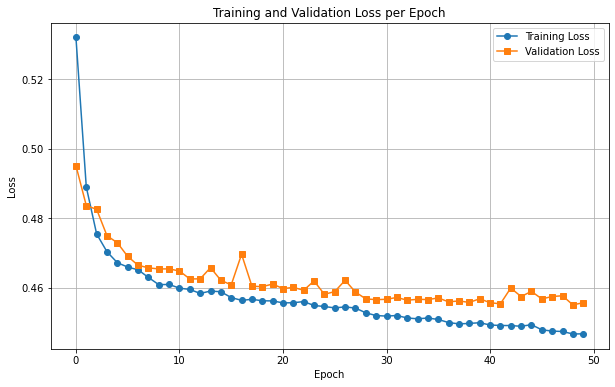

In [5]:
# Maximum number of retries
max_retries = 5
retry_count = 0

# Retry logic
while retry_count < max_retries:
    try:
        mxTn = myTrain(train_loader, val_loader)
        loss_each_epoch, model_list, epoch = mxTn.train(ctx, epochs = 50)
        saveAsCSV(["Current Epoch", "Training Loss", "Validation Loss"], lossFile, loss_each_epoch)
        SaveModels(output_models, model_list)
        lossPlot(loss_each_epoch, output_directory)
        break
    except MXNetError  as e:
        if 'CUDNN_STATUS_EXECUTION_FAILED' in str(e):
            print(f"cuDNN execution failed. Retrying... ({retry_count + 1}/{max_retries})")
            mx.nd.waitall()  # Clear GPU memory
            time.sleep(5) # Wait for a few seconds before retrying
            retry_count += 1 # Increment the retry counter
        else:
            raise  # If it's another error, raise it

# Check if maximum retries were reached
if retry_count == max_retries:
    print("Maximum retries reached. Training failed due to cuDNN error.")

In [21]:
print(result_path)

D:\Source\Output\Result_2022\VNIR\648\result


In [27]:
def get_model_file_name():
    files = os.listdir(output_models)  # Get all files in the folder
    if files:
        last_file = os.path.join(output_models, f'model_VNIR_{len(files)-1}.params')
        print(f"This model is using: {last_file}")
        return last_file
    else:
        print("The folder is empty.")

def visualize_predictions(result_path, image_dict, val_ids, t_ext , t_bound , is2022 = True):    
    print(f"Starting visualization with t_ext = {t_ext}, t_bound = {t_bound}")
    modelPath = rf"{get_model_file_name()}"
    netPredict = myModel.MyFractalResUNetcmtsk(True, modelPath, ctx)
    ious=[]

    for id in val_ids:  # Limit to 'num_images' for visualization
        print(f"Processing image ID: {id}")
        try:
            img = images.getImage(id, image_dict, ctx)
            
            currentMetadata = image_dict[id]
            with autograd.predict_mode():  
                outputs = netPredict.net(img) 
                pred_segm  = np.array(outputs[0][0,1,:,:].asnumpy())
                pred_bound =  np.array(outputs[1][0,1,:,:].asnumpy())

                pred_segm = 1-pred_segm
                pred_segm = np.where(pred_segm < 0.6, 0, 1).astype(np.uint8)
        
                #Apply threshold to pred_segm
                #pred_segm_binary = (1-pred_segm).astype(np.float32)
                print("Shape of pred_segm:", pred_segm.shape, "Shape of pred_bound:", pred_bound.shape, "Shape of binary_extent_mask:", pred_segm.shape)
                print("NaNs in pred_segm:", np.isnan(pred_segm).sum(), "NaNs in binary_extent_mask:", np.isnan(pred_segm).sum())

                inst =InstSegm(pred_segm, pred_bound, t_ext=t_ext, t_bound=t_bound)   # perform instance segmentation
                print("NaNs in inst:", np.isnan(inst).sum())
                inst = np.nan_to_num(inst, nan=0)
                
                #print(f'inst_Unique_labels: {np.unique(inst)}')
                output_shapefile_path = visualize_all(id, img, currentMetadata, outputs, pred_segm, pred_bound, inst, result_path)

                print("Start IOU calculation")
                csv_file_path = os.path.join(result_path, str(id), "iou.csv")
                ref_path = const.output_ref_2022    
                if not is2022:
                    ref_path = const.output_ref_2010

                iou_score= get_iou(os.path.join(ref_path, f'tile_{id}.shp'), os.path.join(output_shapefile_path, f'{str(id)}.shp'))

                ious.append({ "ID": id,"IOU": iou_score })
                ious.append({"ID": f't_ext: {t_ext}',"IOU": f't_bound: {t_bound}'}) 
                saveAsCSV(["ID", "IOU"], csv_file_path, ious, True)

        except Exception as e:
            print(f"Error processing image ID {id}: {e}")
    
    

def visualize(result_path,image_dict, val_ids,  t_ext , t_bound , is2022 = True):
    random_val_ids = random.choice(val_ids) # Choose a random validation ID
    visualize_predictions(result_path, image_dict,[random_val_ids],t_ext = t_ext, t_bound = t_bound, is2022 = is2022)
    print("Visualization completed successfully.")
 


# Applying model in 2022 images

In [28]:
visualize(result_path,image_dict, val_ids, t_ext = 0.3, t_bound = 0.09)

Starting visualization with t_ext = 0.3, t_bound = 0.09
This model is using: D:\Source\Output\Result_2022\VNIR\648\models\model_VNIR_49.params
depth:= 0, nfilters: 32, nheads::8, widths::1
depth:= 1, nfilters: 64, nheads::16, widths::1
depth:= 2, nfilters: 128, nheads::32, widths::1
depth:= 3, nfilters: 256, nheads::64, widths::1
depth:= 4, nfilters: 512, nheads::128, widths::1
depth:= 5, nfilters: 1024, nheads::256, widths::1
depth:= 6, nfilters: 512, nheads::256, widths::1
depth:= 7, nfilters: 256, nheads::128, widths::1
depth:= 8, nfilters: 128, nheads::64, widths::1
depth:= 9, nfilters: 64, nheads::32, widths::1
depth:= 10, nfilters: 32, nheads::16, widths::1


TypeError: fname required to be a string

# Applying model in 2010 images

In [ ]:
images_2010 = ImageDict(const.images_2010, False)
testimages = 10
image_2010_dict = images_2010.load_tif_files(imageType, numberOfimages=testimages)
output_directory_2010 = os.path.join(const.result_2010, imageType, str(testimages))
makedir(output_directory_2010)

D:\Source\Output\Result_2010\VNIR\10
D:\Source\Output\Result_2010\VNIR\10


In [1]:
#list(image_2010_dict.keys())
visualize(image_2010_dict, list(image_2010_dict.keys()),  t_ext = 0.3, t_bound = 0.09, is2022= False)

NameError: name 'visualize' is not defined